In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [3]:
# File path
morbidity_file_path = 'database_var.csv'

# Read the CSV file into a DataFrame with 'latin-1' encoding
morbidity_df = pd.read_csv(morbidity_file_path, encoding='latin-1')

# Mapping of variable numbers to variable names
variable_mapping_morbidity = {
    'v1': 'Geography',
    'v2': 'Geography Type',
    'v3': 'Geography Note',
    'v4': 'Year Grouping',
    'v5': 'Gender',
    'v6': 'Hospital morbidity',
    'v7': 'Diseases of the circulatory system',
    'v8': 'Heart disease',
    'v9': 'Diseases of the digestive system',
    'v10': 'Diseases of intestine and peritoneum',
    'v11': 'Diseases of gallbladder',
    'v12': 'Diseases of esophagus, stomach and duodenum',
    'v13': 'Ulcer',
    'v14': 'Diseases of the respiratory system',
    'v15': 'Chronic obstructions, pulmonary diseases, etc',
    'v16': 'Pneumonia',
    'v17': 'Asthma',
    'v18': 'Diseases of the upper respiratory tract',
    'v19': 'Chronic diseases of tonsils and adenoids',
    'v20': 'Acute upper respiratory infections',
    'v21': 'Diseases of the genitourinary system',
    'v22': 'Diseases of female genital organs',
    'v23': 'Diseases of the urinary system',
    'v24': 'Diseases of male genital organs',
    'v25': 'Injury and poisoning',
    'v26': 'Fractures',
    'v27': 'Neoplasms (cancer)',
    'v28': 'Malignant neoplasms',
    'v29': 'Age Group: Less than 20',
    'v30': 'Age Group: 0-4',
    'v31': 'Age Group: 5-9',
    'v32': 'Age Group: 10-14',
    'v33': 'Age Group: 15-19',
    'v34': 'Age Group: 20 to 34',
    'v35': 'Age Group: 20-24',
    'v36': 'Age Group: 25-29',
    'v37': 'Age Group: 30-34',
    'v38': 'Age Group: 35 to 54',
    'v39': 'Age Group: 35-39',
    'v40': 'Age Group: 40-44',
    'v41': 'Age Group: 45-49',
    'v42': 'Age Group: 50-54',
    'v43': 'Age Group: 55+',
    'v44': 'Age Group: 55-59',
    'v45': 'Age Group: 60-64',
    'v46': 'Age Group: 65+',
    'v47': 'Age Group: 65-74',
    'v48': 'Age Group: 75-84',
    'v49': 'Age Group: 85+',
    'v50': 'Age Group: 60+',
    'v51': 'Other diagnoses',
    'v52': 'Other diagnoses: Age less than 20',
    'v53': 'Other diagnoses: Age 20-39',
    'v54': 'Other diagnoses: Age 40-59',
    'v55': 'Other diagnoses: Age 60+',
    'v56': 'Median age',
    'v57': 'Days in hospital (average)'
}

# Rename columns using the mapping
morbidity_df.rename(columns=variable_mapping_morbidity, inplace=True)

# Features to include in testing
features = [
    # Age Groups
    'Age Group: 0-4',
    'Age Group: 5-9',
    'Age Group: 15-19',
    'Age Group: 20 to 34',
    'Age Group: 20-24',
    'Age Group: 25-29',
    'Age Group: 30-34',
    'Age Group: 35-39',
    'Age Group: 40-44',
    'Age Group: 45-49',
    'Age Group: 50-54',
    'Age Group: 55-59',
    'Age Group: 60-64',
    'Age Group: 65-74',
    'Age Group: 75-84',
    'Age Group: 85+',

    # Respiratory Diseases
    'Acute upper respiratory infections',
    'Diseases of the respiratory system',
    'Chronic obstructions, pulmonary diseases, etc',
    'Diseases of the upper respiratory tract',
    'Asthma',

    # Digestive System Diseases
    'Diseases of the digestive system',
    'Diseases of intestine and peritoneum',
    'Diseases of gallbladder',
    'Diseases of esophagus, stomach and duodenum',

    # Circulatory System Diseases
    'Diseases of the circulatory system',
    'Heart disease',

    # Genitourinary System Diseases
    'Diseases of female genital organs',
    'Diseases of the urinary system',
    'Diseases of male genital organs',

    # Neoplasms
    'Neoplasms (cancer)',
    'Malignant neoplasms',

    # Injury and Poisoning
    'Fractures',

    # Other
    'Chronic diseases of tonsils and adenoids',
    'Other diagnoses',
    'Other diagnoses: Age less than 20',
    'Other diagnoses: Age 20-39',
    'Other diagnoses: Age 40-59',
    'Other diagnoses: Age 60+',
    'Hospital morbidity',
    'Year Grouping'
]

object


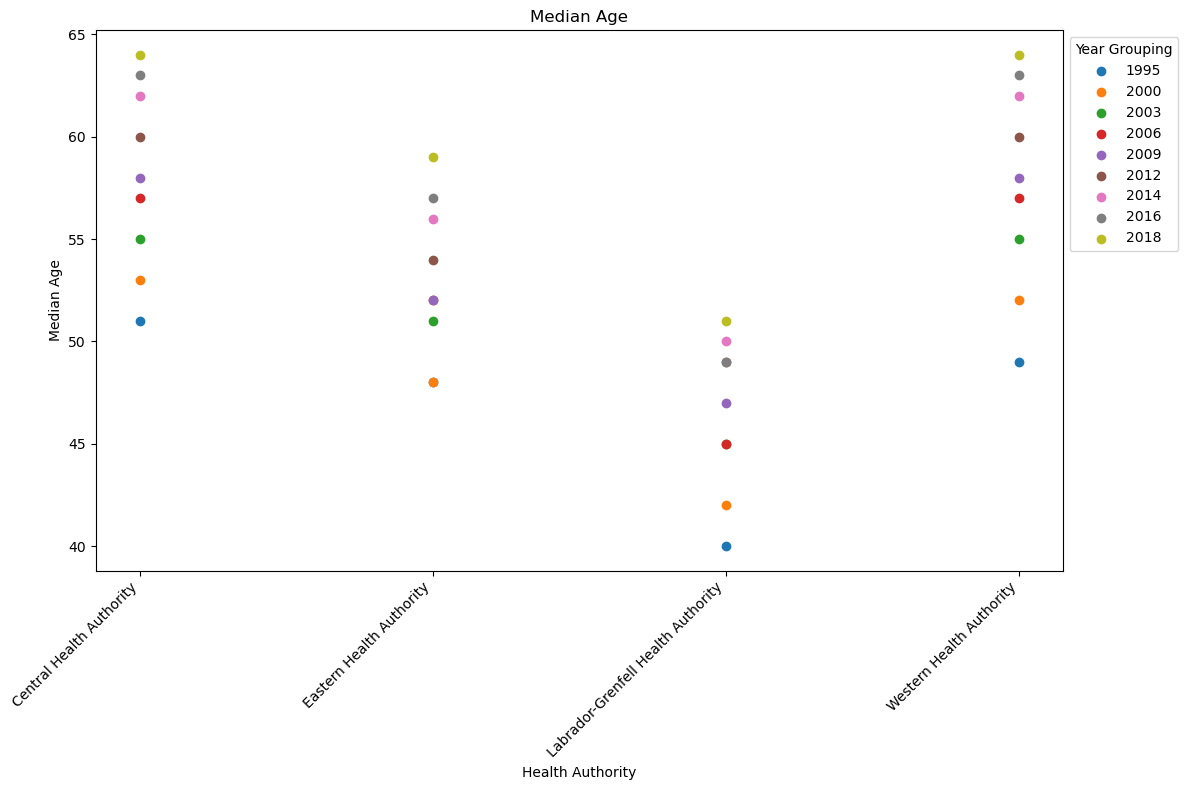

In [5]:
# Check the data types of 'Median age' column
print(morbidity_df['Median age'].dtype)

# Convert 'Median age' column to numeric, coercing errors to NaN (if necessary)
morbidity_df['Median age'] = pd.to_numeric(morbidity_df['Median age'], errors='coerce')

# Filter data for 'Health Authority' under 'Geography Type'
health_authority_df = morbidity_df[morbidity_df['Geography Type'] == 'Health Authority']

# Group by 'Year Grouping' and 'Geography' and calculate the median of 'Median age'
median_age_stats = health_authority_df.groupby(['Year Grouping', 'Geography'])['Median age'].median().reset_index()

# Plotting the median age per health authority for each year grouping using a scatter plot
plt.figure(figsize=(12, 8))

# Iterate over unique year groupings
for year_grouping in median_age_stats['Year Grouping'].unique():
    year_grouping_data = median_age_stats[median_age_stats['Year Grouping'] == year_grouping]
    plt.scatter(year_grouping_data['Geography'], year_grouping_data['Median age'], marker='o', label=str(year_grouping))

plt.title('Median Age')
plt.xlabel('Health Authority')
plt.ylabel('Median Age')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Year Grouping', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Save the plot as an image file (e.g., PNG format)
plt.savefig('median_age_per_health_authority_scatter.png', dpi=300)  # Adjust dpi as needed for quality
plt.show()

In [7]:
# Define target column
target_col = 'Days in hospital (average)'

# Work with a copy of the DataFrame
morbidity_df = morbidity_df.copy()

# Convert target column to numeric, coercing errors to NaN
morbidity_df[target_col] = pd.to_numeric(morbidity_df[target_col], errors='coerce')

# Drop rows where target is NaN
morbidity_df = morbidity_df.dropna(subset=[target_col])

# Calculate IQR to detect and remove outliers
Q1 = morbidity_df[target_col].quantile(0.25)
Q3 = morbidity_df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
morbidity_df_filtered = morbidity_df[(morbidity_df[target_col] >= lower_bound) & (morbidity_df[target_col] <= upper_bound)]

# Prepare the feature matrix X and target vector y
X = morbidity_df_filtered[features].copy()
y = morbidity_df_filtered[target_col].copy()

# Convert feature columns to numeric where applicable
for col in X.columns:
    if X[col].dtype == 'object':
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Drop rows with NaN values in features
X = X.dropna()

# Ensure that y is aligned with X after dropping NaNs
y = y.loc[X.index]

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute missing values with most frequent value
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))  # One-hot encode categorical features
])

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline that includes preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))  # RandomForestRegressor
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 0.6368310043668122
R-squared: 0.7358366842796349
Mean Absolute Error: 0.5761135371179039


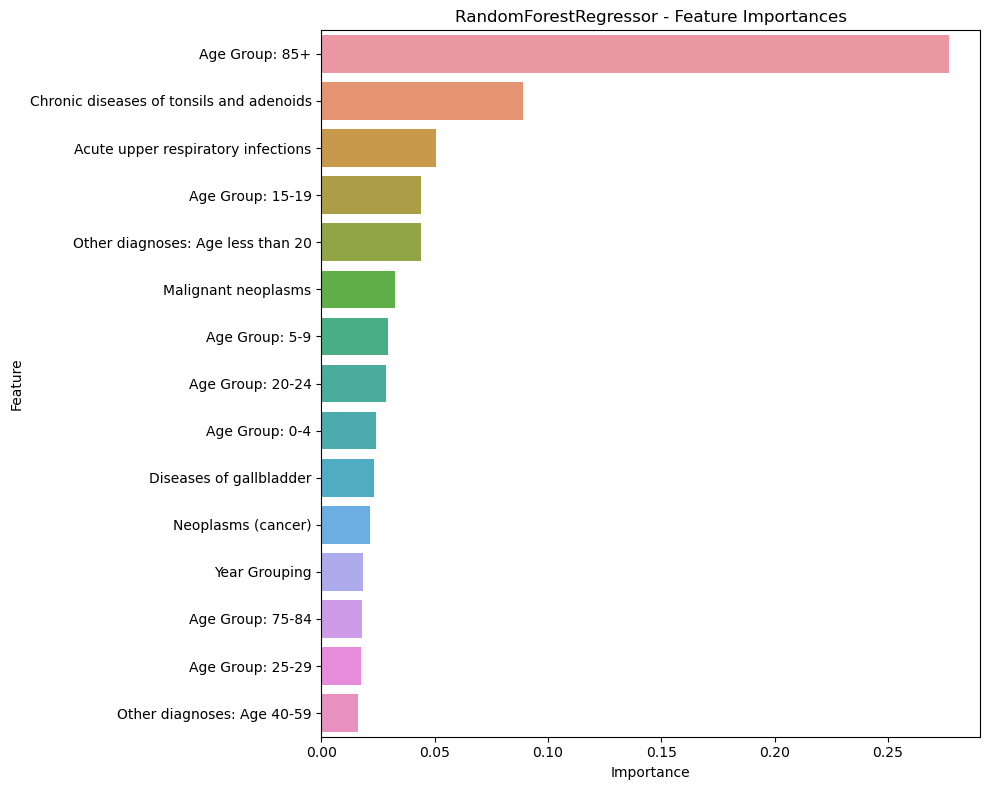

In [57]:
# Get feature importances from the model
feature_importances = pipeline.named_steps['regressor'].feature_importances_

# Get the list of feature names after preprocessing
preprocessed_features = X.columns

# Combine feature names and importances into a DataFrame for easier manipulation
feature_importances_df = pd.DataFrame({
    'Feature': preprocessed_features,
    'Importance': feature_importances
})

# Sort features by importance (descending order)
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df[:15])  # Plot top 15 features
plt.title('RandomForestRegressor - Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()

# Save the plot as an image file (e.g., PNG)
plt.savefig('feature_importances.png')

# Display the plot
plt.show()



In [ ]:
#use seletcted features of importance

selected_features = [
    'Age Group: 15-19', 
    'Age Group: 20-24', 
    'Age Group: 85+',
    'Acute upper respiratory infections',
    'Diseases of the digestive system', 
    'Diseases of gallbladder',
    'Malignant neoplasms', 
    'Chronic diseases of tonsils and adenoids',
    'Other diagnoses: Age less than 20', 
    'Other diagnoses: Age 40-59'
]


In [44]:
# Define numeric features
numeric_features = ['Age Group: 15-19', 'Age Group: 20-24', 'Age Group: 85+']

# Define categorical features
categorical_features = [
    'Acute upper respiratory infections', 
    'Diseases of the digestive system',
    'Diseases of gallbladder', 
    'Malignant neoplasms',
    'Chronic diseases of tonsils and adenoids',
    'Other diagnoses: Age less than 20',
    'Other diagnoses: Age 40-59'
]

# Define preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))  # Impute missing values with most frequent value
])

# Combine preprocessing pipelines using ColumnTransformer
preprocessor_refined = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define your pipeline with the preprocessor_refined and RandomForestRegressor
pipeline_refined = Pipeline(steps=[
    ('preprocessor', preprocessor_refined),
    ('regressor', RandomForestRegressor(random_state=42))  # Use RandomForestRegressor
])

# Fit the pipeline on the training data using X_train and y_train
pipeline_refined.fit(X_train, y_train)

# Predict on the test set using X_test
y_pred_refined = pipeline_refined.predict(X_test)

# Evaluate the refined model
mse_refined = mean_squared_error(y_test, y_pred_refined)
r2_refined = r2_score(y_test, y_pred_refined)
mae_refined = mean_absolute_error(y_test, y_pred_refined)

print("Refined Model Performance:")
print(f"Mean Squared Error: {mse_refined}")
print(f"R-squared: {r2_refined}")
print(f"Mean Absolute Error: {mae_refined}")

Refined Model Performance:
Mean Squared Error: 0.6992065987384766
R-squared: 0.7099627181626263
Mean Absolute Error: 0.6089228529839883


In [45]:
# Perform cross-validation
cv_scores = cross_val_score(pipeline_refined, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert to positive for interpretation
cv_scores = -cv_scores

# Calculate mean and standard deviation of cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print(f"Cross-Validation Mean Squared Error: {cv_mean}")
print(f"Cross-Validation Standard Deviation: {cv_std}")


Cross-Validation Mean Squared Error: 1.1403903328961984
Cross-Validation Standard Deviation: 0.2958736488656572


In [48]:
# Fit the refined pipeline on the entire data (for cross-validation)
pipeline_refined.fit(X, y)

# Perform cross-validation
cv_scores = cross_val_score(pipeline_refined, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert to positive for interpretation
cv_scores = -cv_scores

# Calculate cross-validation metrics
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

# Predict on the test set
y_pred_refined = pipeline_refined.predict(X_test)

# Evaluate the refined model
mse_refined = mean_squared_error(y_test, y_pred_refined)
r2_refined = r2_score(y_test, y_pred_refined)
mae_refined = mean_absolute_error(y_test, y_pred_refined)

print("Final Refined Model Performance:")
print(f"Mean Squared Error: {mse_refined}")
print(f"R-squared: {r2_refined}")
print(f"Mean Absolute Error: {mae_refined}")

print("\nCross-Validation Results:")
print(f"Mean Squared Error (CV): {cv_mean}")
print(f"Standard Deviation (CV): {cv_std}")

Final Refined Model Performance:
Mean Squared Error: 0.08797030567685589
R-squared: 0.9635091139200456
Mean Absolute Error: 0.21030567685589513

Cross-Validation Results:
Mean Squared Error (CV): 1.1403903328961984
Standard Deviation (CV): 0.2958736488656572


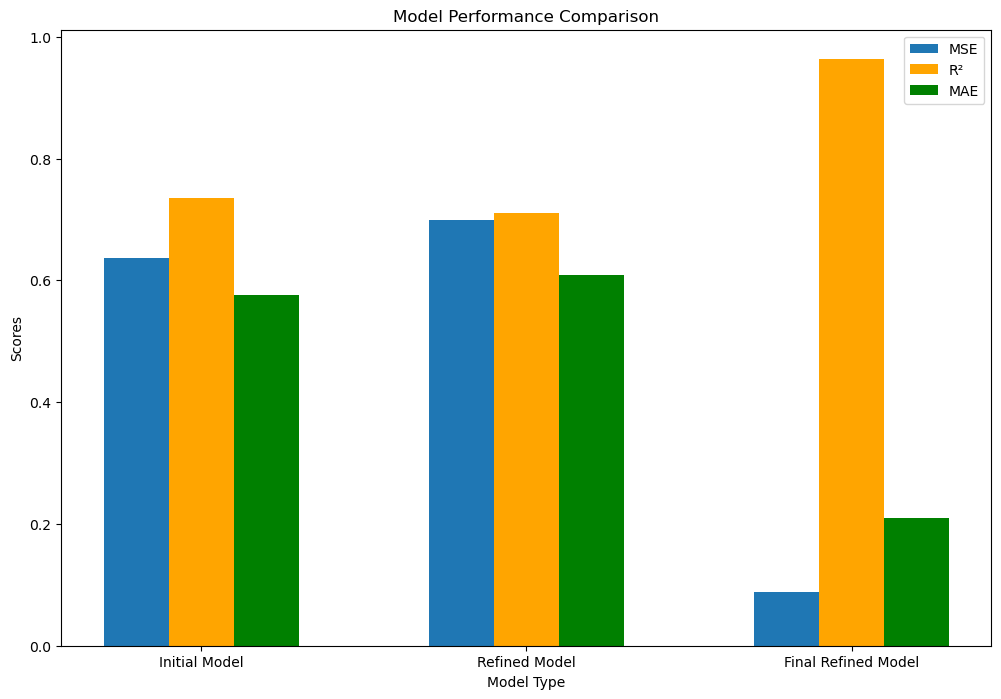

In [54]:
#do some comparisons of the models performance

# Model names
models = ['Initial Model', 'Refined Model', 'Final Refined Model']

# Metrics
mse_values = [0.6368, 0.6992, 0.0880]
r2_values = [0.7358, 0.7100, 0.9635]
mae_values = [0.5761, 0.6089, 0.2103]

x = np.arange(len(models))  # the label locations

fig, ax = plt.subplots(figsize=(12, 8))
width = 0.2  # the width of the bars

# Bar positions
x_mse = x - width
x_r2 = x
x_mae = x + width

bars_mse = ax.bar(x_mse, mse_values, width, label='MSE')
bars_r2 = ax.bar(x_r2, r2_values, width, label='R²', color='orange')
bars_mae = ax.bar(x_mae, mae_values, width, label='MAE', color='green')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Model Type')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

plt.show()